In [156]:
import pandas as pd

In [157]:
# read from json file
df = pd.read_json('dota.json')

df.head()

,id,name,localized_name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,...,6_win,7_pick,7_win,8_pick,8_win,null_pick,null_win,winrate,lane,main_role
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",/apps/dota2/images/heroes/antimage_full.png?,/apps/dota2/images/heroes/antimage_icon.png,200,0.25,...,8610,7417,3591,1796,819,2386741,0,47.867144,1,safelane
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler]",/apps/dota2/images/heroes/axe_full.png?,/apps/dota2/images/heroes/axe_icon.png,200,2.75,...,5964,4676,2272,951,469,1927988,0,48.711569,3,offlane
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",/apps/dota2/images/heroes/bane_full.png?,/apps/dota2/images/heroes/bane_icon.png,200,NaN,...,2044,1962,1030,750,399,507261,0,52.691740,5,hard_support
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",/apps/dota2/images/heroes/bloodseeker_full.png?,/apps/dota2/images/heroes/bloodseeker_icon.png,200,NaN,...,2828,2479,1219,855,428,878740,0,49.400120,1,safelane
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",/apps/dota2/images/heroes/crystal_maiden_full....,/apps/dota2/images/heroes/crystal_maiden_icon.png,200,NaN,...,9025,7684,3865,2386,1156,2259888,0,49.860973,5,hard_support


In [158]:
features = ['base_health', 'base_health_regen', 'base_mana', 'base_mana_regen', 'base_armor', 
            'base_mr', 'base_attack_min', 'base_attack_max', 'base_str', 'base_agi', 'base_int', 'str_gain',
            'agi_gain', 'int_gain', 'attack_range', 'projectile_speed', 'attack_rate', 'move_speed', 'turn_rate'
            ]

# fill missing values with mean
df[features] = df[features].fillna(df[features].mean())


# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

print(df[features].head())



   base_health  base_health_regen  base_mana  base_mana_regen  base_armor  \
0          0.0      -1.432614e+00        0.0        -0.342659   -0.858034   
1          0.0       3.610188e+00        0.0        -0.342659   -0.858034   
2          0.0      -4.478908e-16        0.0        -0.342659    0.425008   
3          0.0      -4.478908e-16        0.0        -0.342659    1.066529   
4          0.0      -4.478908e-16        0.0         4.466593   -0.858034   

   base_mr  base_attack_min  base_attack_max  base_str  base_agi  base_int  \
0      0.0         0.286342        -0.097350  0.564793  1.273243 -1.977378   
1      0.0         0.019977        -0.343288  1.235833  0.401408 -0.456318   
2      0.0         1.085437         0.886401  0.229272  0.837326  0.557722   
3      0.0         1.085437         0.886401  0.900313  0.837326 -0.709828   
4      0.0         0.153160         0.025619 -1.112809 -0.470428 -0.963338   

   str_gain  agi_gain  int_gain  attack_range  projectile_speed  att

In [159]:
# import kmeans and vq
from scipy.cluster.vq import kmeans, vq

# kmeans
k = 6
centroids, _ = kmeans(df[features], k)

In [160]:
df['cluster_labels'], _ = vq(df[features], centroids)

# print cluster centers of each feature
print(df.groupby('cluster_labels')[features].mean())

                base_health  base_health_regen  base_mana  base_mana_regen  \
cluster_labels                                                               
0                       0.0          -0.021330        0.0        -0.342659   
1                       0.0           2.032402        0.0        -0.075479   
2                       0.0          -0.814998        0.0        -0.155633   
3                       0.0          -0.068765        0.0        -0.246474   
4                       0.0           0.010028        0.0         3.174107   
5                       0.0          -0.050619        0.0        -0.142274   

                base_armor  base_mr  base_attack_min  base_attack_max  \
cluster_labels                                                          
0                -0.278883      0.0        -0.383270        -0.227151   
1                 1.708049      0.0         0.523111         0.367199   
2                -0.359074      0.0        -0.734723        -0.876154   
3         

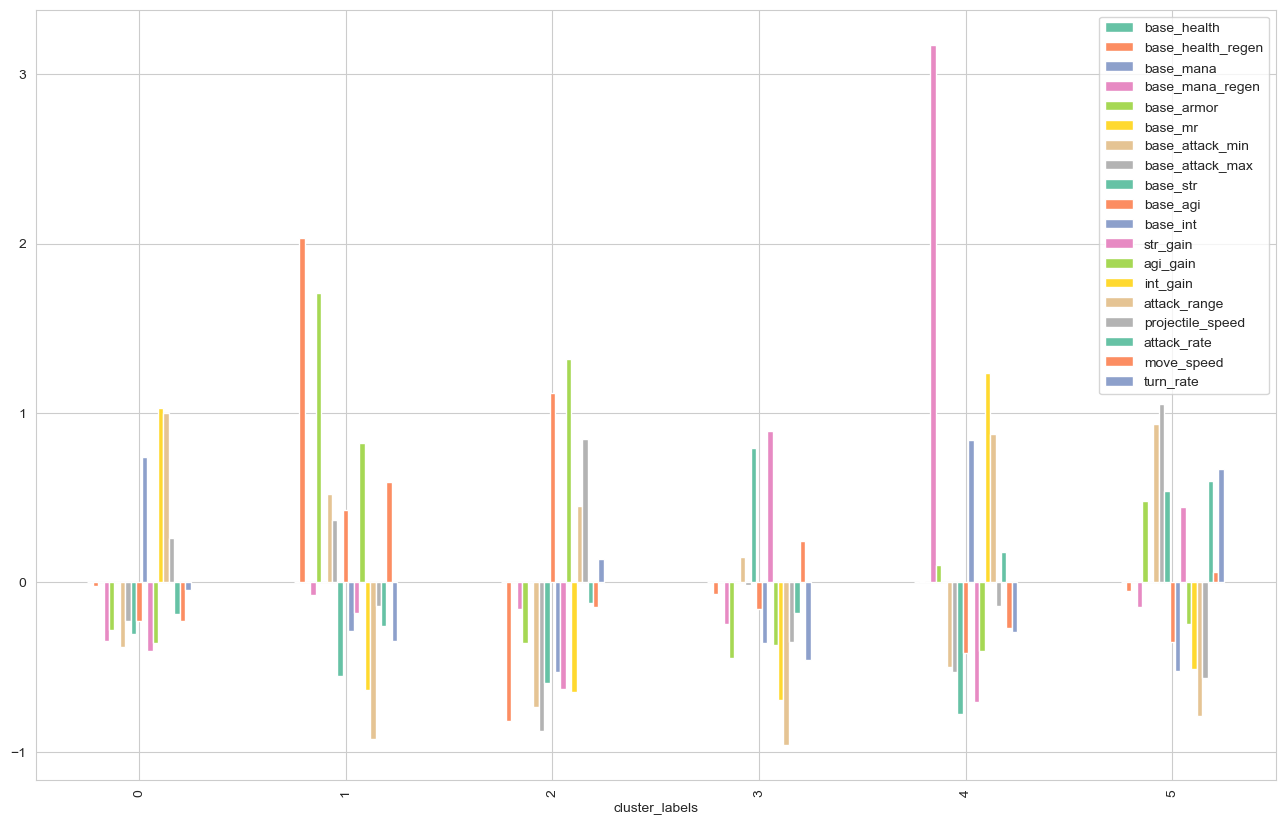

In [161]:
from matplotlib import pyplot as plt

# plot cluster centers of each feature
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='bar', figsize=(16, 10))
plt.show()

In [162]:
# get the name column of the heroes
for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['localized_name'].values)
    print('\n')
    


Cluster 3:
['Anti-Mage' 'Axe' 'Sand King' 'Tiny' 'Kunkka' 'Tidehunter' 'Beastmaster'
 'Wraith King' 'Dragon Knight' 'Clockwerk' 'Huskar' 'Broodmother'
 'Spectre' 'Ursa' 'Alchemist' 'Lycan' 'Brewmaster' 'Centaur Warrunner'
 'Timbersaw' 'Tusk' 'Abaddon' 'Elder Titan' 'Legion Commander'
 'Ember Spirit' 'Earth Spirit']


Cluster 5:
['Bane' 'Bloodseeker' 'Earthshaker' 'Pudge' 'Sven' 'Shadow Shaman'
 'Slardar' 'Faceless Void' 'Lifestealer' 'Dark Seer' 'Omniknight' 'Doom'
 'Spirit Breaker' 'Chaos Knight' 'Meepo' 'Treant Protector' 'Undying'
 'Slark' 'Magnus' 'Bristleback' 'Underlord' 'Phoenix' 'Pangolier' 'Mars']


Cluster 4:
['Crystal Maiden' 'Lich' 'Tinker' 'Pugna' 'Weaver' 'Techies' 'Oracle'
 'Void Spirit']


Cluster 2:
['Drow Ranger' 'Juggernaut' 'Mirana' 'Morphling' 'Shadow Fiend' 'Razor'
 'Vengeful Spirit' 'Sniper' 'Venomancer' 'Phantom Assassin'
 'Templar Assassin' 'Viper' 'Luna' 'Clinkz' 'Gyrocopter' 'Lone Druid'
 'Troll Warlord' 'Hoodwink']


Cluster 1:
['Phantom Lancer' 'Riki' 'Nigh

In [163]:
# get the name column of the heroes
for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['primary_attr'].values)
    print('\n')



Cluster 3:
['agi' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'agi'
 'agi' 'agi' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'agi'
 'str']


Cluster 5:
['int' 'agi' 'str' 'str' 'str' 'int' 'str' 'agi' 'str' 'int' 'str' 'str'
 'str' 'str' 'agi' 'str' 'str' 'agi' 'str' 'str' 'str' 'str' 'agi' 'str']


Cluster 4:
['int' 'int' 'int' 'int' 'agi' 'int' 'int' 'int']


Cluster 2:
['agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi'
 'agi' 'agi' 'agi' 'agi' 'agi' 'agi']


Cluster 1:
['agi' 'agi' 'str' 'agi' 'int' 'agi' 'agi' 'agi' 'agi']


Cluster 0:
['int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int'
 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int'
 'int' 'int' 'int' 'str' 'int' 'agi' 'int' 'int' 'agi' 'int' 'int' 'str']




In [164]:
# get the name column of the heroes
for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['attack_type'].values)
    print('\n')

Cluster 3:
['Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee'
 'Melee' 'Ranged' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee'
 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee']


Cluster 5:
['Ranged' 'Melee' 'Melee' 'Melee' 'Melee' 'Ranged' 'Melee' 'Melee' 'Melee'
 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee'
 'Melee' 'Melee' 'Melee' 'Ranged' 'Melee' 'Melee']


Cluster 4:
['Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Melee']


Cluster 2:
['Ranged' 'Melee' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged'
 'Ranged' 'Melee' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged'
 'Ranged' 'Ranged']


Cluster 1:
['Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee']


Cluster 0:
['Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged'
 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged'
 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged'

In [165]:

for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['main_role'].values)
    print('\n')

Cluster 3:
['safelane' 'offlane' 'support' 'offlane' 'mid' 'offlane' 'offlane'
 'safelane' 'offlane' 'offlane' 'mid' 'mid' 'safelane' 'safelane' 'mid'
 'safelane' 'offlane' 'offlane' 'offlane' 'offlane' 'support' 'offlane'
 'offlane' 'mid' 'offlane']


Cluster 5:
['hard_support' 'safelane' 'support' 'offlane' 'safelane' 'hard_support'
 'offlane' 'safelane' 'safelane' 'offlane' 'support' 'offlane' 'offlane'
 'offlane' 'mid' 'support' 'support' 'safelane' 'offlane' 'offlane'
 'support' 'support' 'offlane' 'offlane']


Cluster 4:
['hard_support' 'hard_support' 'mid' 'mid' 'safelane' 'offlane'
 'hard_support' 'mid']


Cluster 2:
['safelane' 'safelane' 'support' 'safelane' 'mid' 'offlane' 'hard_support'
 'mid' 'support' 'safelane' 'mid' 'mid' 'safelane' 'mid' 'safelane' 'mid'
 'safelane' 'offlane']


Cluster 1:
['safelane' 'safelane' 'offlane' 'offlane' 'hard_support' 'offlane'
 'safelane' 'safelane' 'safelane']


Cluster 0:
['mid' 'mid' 'support' 'mid' 'support' 'hard_support' 'hard_suppor

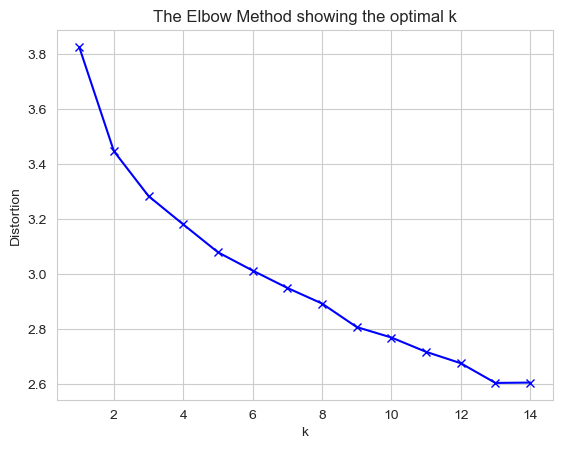

In [166]:
# perform elbow method to find optimal k
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 15)
for k in K:
    centroids, distortion = kmeans(df[features], k)
    distortions.append(distortion)

# plot elbow method
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
